In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
df_cap_pre = pd.read_csv('../../Data/Downloaded/pre_cap.csv')
df_cap_post = pd.read_csv('../../Data/Downloaded/post_cap.csv')
df_pi_pre   = pd.read_csv('../../Data/Downloaded/pre_price.csv')
df_pi_post  = pd.read_csv('../../Data/Downloaded/post_price.csv')
df_year_post = pd.read_csv('../../Data/Downloaded/post_year.csv')

In [3]:
# take price at 1990
p_1990 = df_pi_post.loc[35]['pi_ind']

In [4]:
link_pi_55_to_90 = p_1990 / df_pi_post.loc[0]['pi_ind']

In [5]:
link_pi_55_to_90

3.732851985559567

In [6]:
link_pi_34_to_55 = df_pi_pre.loc[74]['price_ind_inv']

In [7]:
link_pi_34_to_55

359.7

In [8]:
link_pi_pre_34_to_90 = link_pi_34_to_55 * link_pi_55_to_90

In [9]:
link_pi_pre_34_to_90

1342.7068592057763

In [10]:
# adjust unit from one million yen to one billion yen
adj_unit = 1e-3

In [11]:
df_cap_pre['prm_cap_p90_bil'] = df_cap_pre['prm_cap'] * link_pi_pre_34_to_90 * adj_unit
df_cap_pre['non_prm_cap_p90_bil'] = df_cap_pre['non_prm_cap'] * link_pi_pre_34_to_90 * adj_unit

In [12]:
adj_unit

0.001

In [13]:
df_cap_post['prm_cap_p90_bil'] = df_cap_post['prm_cap'] * adj_unit
df_cap_post['non_prm_cap_p90_bil'] = df_cap_post['non_prm_cap'] * adj_unit

In [14]:
df_cap_post_yr = df_cap_post.join(df_year_post.set_index('year_jpn'), on = 'year_jpn')

In [15]:
df_cap_post_picked = df_cap_post_yr[['year_wst', 'prm_cap_p90_bil', 'non_prm_cap_p90_bil']]

In [16]:
df_cap_pre_picked = df_cap_pre[['year_wst', 'prm_cap_p90_bil', 'non_prm_cap_p90_bil']]

In [17]:
df_cap_merged = pd.concat([df_cap_pre_picked, df_cap_post_picked])

In [18]:
df_cap_merged

,year_wst,prm_cap_p90_bil,non_prm_cap_p90_bil
0,1881,4221.470365,1824.738622
1,1882,4229.526606,1878.446896
2,1883,4234.897434,1930.812464
3,1884,4238.925555,1988.548858
4,1885,4238.925555,2047.627960
...,...,...,...
41,1996,99372.316000,815406.807000
42,1997,101651.667000,857367.991000
43,1998,103256.590000,904049.845000
44,1999,104148.292000,940668.251000


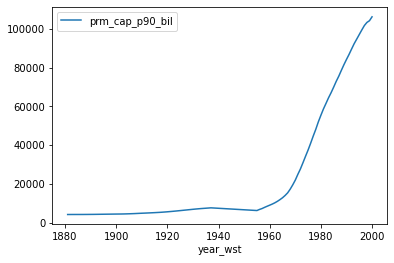

In [19]:
fig, ax = plt.subplots()
df_cap_merged.plot(x = 'year_wst', y = 'prm_cap_p90_bil', ax = ax)
plt.show()

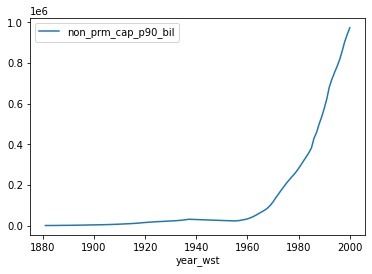

In [20]:
fig, ax = plt.subplots()
df_cap_merged.plot(x = 'year_wst', y = 'non_prm_cap_p90_bil', ax = ax)
plt.show()

In [21]:
df_pre = df_cap_pre_picked
df_post = df_cap_post_picked

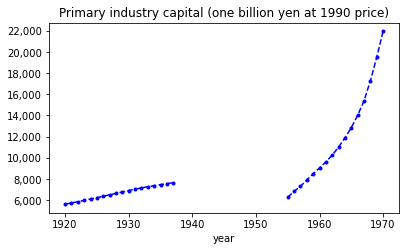

In [22]:
fig, ax = plt.subplots()

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

#plt.rc('pgf', texsystem = 'xelatex')
#df_pre.plot(x = 'year_wst', y = 'prm_cap_p90_bil', 
df_pre[df_pre.year_wst >= 1920].plot(x = 'year_wst', y = 'prm_cap_p90_bil', 
#               label = r'Normalized cap wedge $\biggl(\frac{1 + \tau_{R,t}}{1 + \tau_{C,t}}-1 \biggr)$', 
               marker = '.',
               linestyle = '--',
               color = 'b',
               ax = ax)
#df_post.plot(x = 'year_wst', y = 'tot_cns_p90_mth',  
df_post[df_post.year_wst <= 1970].plot(x = 'year_wst', y = 'prm_cap_p90_bil',  
               marker = '.',
               linestyle = '--',
               color = 'b',
               ax = ax)
#ax.set_rasterized(True)
ax.legend_.remove()
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.xlabel('year')
fig.set_size_inches(w=6.26894, h=3.5)
plt.title('Primary industry capital (one billion yen at 1990 price)')
plt.savefig('../../Notes/comb_prm_cap.pdf')
plt.show()

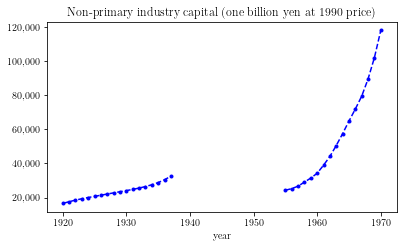

In [23]:
fig, ax = plt.subplots()

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

#plt.rc('pgf', texsystem = 'xelatex')
#df_pre.plot(x = 'year_wst', y = 'prm_cap_p90_bil', 
df_pre[df_pre.year_wst >= 1920].plot(x = 'year_wst', y = 'non_prm_cap_p90_bil', 
#               label = r'Normalized cap wedge $\biggl(\frac{1 + \tau_{R,t}}{1 + \tau_{C,t}}-1 \biggr)$', 
               marker = '.',
               linestyle = '--',
               color = 'b',
               ax = ax)
#df_post.plot(x = 'year_wst', y = 'tot_cns_p90_mth',  
df_post[df_post.year_wst <= 1970].plot(x = 'year_wst', y = 'non_prm_cap_p90_bil',  
               marker = '.',
               linestyle = '--',
               color = 'b',
               ax = ax)
#ax.set_rasterized(True)
ax.legend_.remove()
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.xlabel('year')
fig.set_size_inches(w=6.26894, h=3.5)
plt.title('Non-primary industry capital (one billion yen at 1990 price)')
plt.savefig('../../Notes/comb_non_prm_cap.pdf')
plt.show()